# Explainable AI and simplified model building from deep neural networks as real-time analytical decision support systems

# 0) Data Analysis

## Environment setup

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.plot import plot_image

### Downloading data

2 different options:


1.   Get data from my Drive (it downloads only the data used in the project and they are already correctly splitted) **[Preferred option]**
2.   Get data from the original gitlab (it downloads everything)

In [ ]:
# OPTION 1
# get data from my Drive, it downloads (and unzip) less stuff (i.e. only the used one) and data are already splitted
# ! rm -rf sample_data
# ! gdown --id 1s6JZuJPAqUtnnvezDepApE4BMKo3FP4q
# ! unzip -q muontriggerdata-master.zip
# ! rm -rf muontriggerdata-master.zip

print('\nLoading images with noise...')
train_images = np.load('../muontriggerdata-master/train_images_with_noise.npy')
test_images = np.load('../muontriggerdata-master/test_images_with_noise.npy')

print('\nLoading images without noise...')
train_images_without_noise = np.load('../muontriggerdata-master/train_images_without_noise.npy')
test_images_without_noise = np.load('../muontriggerdata-master/test_images_without_noise.npy')

print('\nLoading labels...')
train_labels = np.load('../muontriggerdata-master/train_labels.npy')
test_labels = np.load('../muontriggerdata-master/test_labels.npy')

print('\nLoading completed.')

In [ ]:
# OPTION 2
# get data from the original GitLab
'''
! rm -rf sample_data
! wget https://gitlab.cern.ch/lsabetta/muontriggerdata/-/archive/master/muontriggerdata-master.zip
! unzip -q muontriggerdata-master.zip
! rm -rf muontriggerdata-master.zip

print('Loading all images...')
images = np.load('muontriggerdata-master/image_one_mu_NO_bkg.npy')
labels = np.load('muontriggerdata-master/label_one_mu_NO_bkg.npy')

print('Loading train and test images...')
train_images = np.load('muontriggerdata-master/train_image384_1mu_with_bkg_4gasgap.npy')
test_images = np.load('muontriggerdata-master/test_image384_1mu_with_bkg_4gasgap.npy')

print('Loading completed.')

# checking shapes of npy arrays
print(images.shape)
print(labels.shape)
print(train_images.shape)
print(test_images.shape)

train_labels = labels[:850003]
test_labels = labels[850003:]
print(train_labels.shape)
print(test_labels.shape)
#np.save('train_labels', train_labels)
#np.save('test_labels', test_labels)

train_images_without_noise = images[:850003]
test_images_without_noise = images[850003:]
print(train_images_without_noise.shape)
print(test_images_without_noise.shape)
#np.save('train_images_without_noise', train_images_without_noise)
#np.save('test_images_without_noise', test_images_without_noise)
'''
print('Option 1 preferred.')

## Data Inspection

In [3]:
# checking shapes of npy arrays
print(train_images.shape)
print(test_images.shape)

#print(train_images_without_noise.shape)
#print(test_images_without_noise.shape)

print(train_labels.shape)
print(test_labels.shape)

(850003, 9, 384)
(94445, 9, 384)
(850003, 5)
(94445, 5)


In [4]:
train_labels_df = pd.DataFrame(train_labels, columns=['pt', 'eta', 'phi', '0', 'nhits'])
train_labels_df.head()

,pt,eta,phi,0,nhits
0,7.876822,0.134104,-1.492906,0.0,13.0
1,7.214939,0.201785,1.493974,0.0,22.0
2,15.957191,0.993240,-1.526925,0.0,21.0
3,16.337940,0.263008,-2.987343,0.0,10.0
4,13.575788,0.149353,-2.909855,0.0,10.0


In [5]:
test_labels_df = pd.DataFrame(test_labels, columns=['pt', 'eta', 'phi', '0', 'nhits'])
test_labels_df.head()

,pt,eta,phi,0,nhits
0,13.491201,0.053108,1.491443,0.0,9.0
1,4.227651,0.205530,2.448244,0.0,15.0
2,13.979775,0.651565,-1.432266,0.0,16.0
3,14.510050,0.939512,2.352675,0.0,14.0
4,10.261550,0.116171,1.363084,0.0,16.0


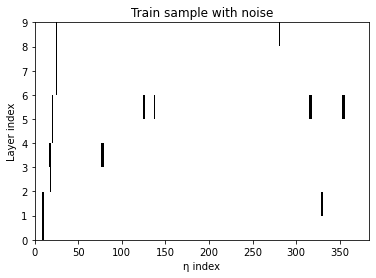

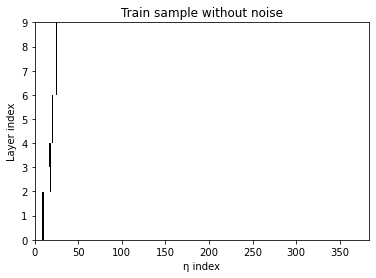

,pt,eta,phi,0,nhits
0,7.876822,0.134104,-1.492906,0.0,13.0


In [13]:
index = 0

_, ax = plt.subplots()
plot_image(ax, train_images[index], 'Train sample with noise', save=True)
plt.show()

_, ax = plt.subplots()
plot_image(ax, train_images_without_noise[index], 'Train sample without noise', save=True)
plt.show()

train_labels_df.loc[[index]]

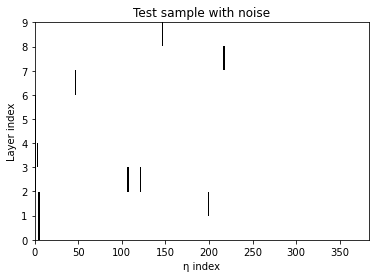

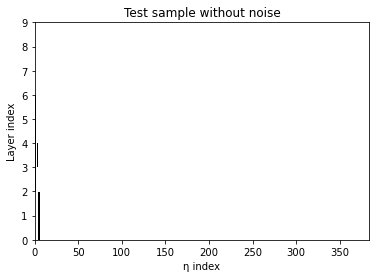

,pt,eta,phi,0,nhits
0,13.491201,0.053108,1.491443,0.0,9.0


In [14]:
_, ax = plt.subplots()
plot_image(ax, test_images[index], 'Test sample with noise', save=False)
plt.show()

_, ax = plt.subplots()
plot_image(ax, test_images_without_noise[index], 'Test sample without noise', save=False)
plt.show()

test_labels_df.loc[[index]]

Our work is focused **ONLY** on predicting values for *pt* and *eta*; therefore, we will drop the remaining parameters in the labels.

In [16]:
train_labels_df = train_labels_df.drop(columns=['phi', '0', 'nhits'])
test_labels_df = test_labels_df.drop(columns=['phi', '0', 'nhits'])

A deeper inspection can be performed through *seaborn*.

Finally, we can analyze some basic properties about data distribution in the labels *DataFrame*s.

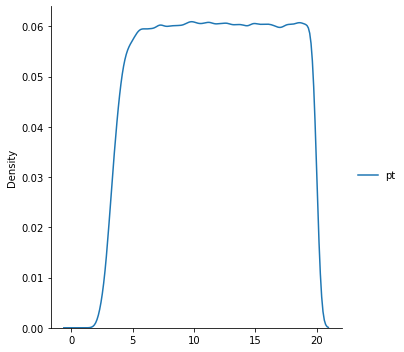

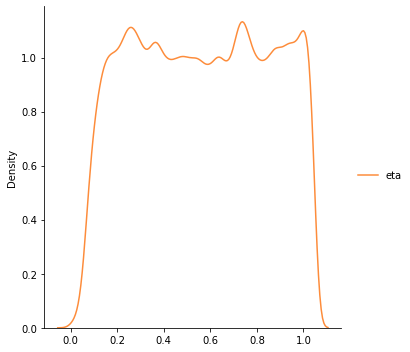

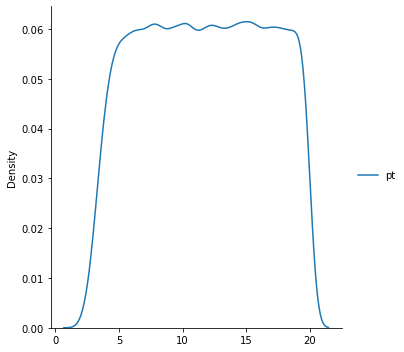

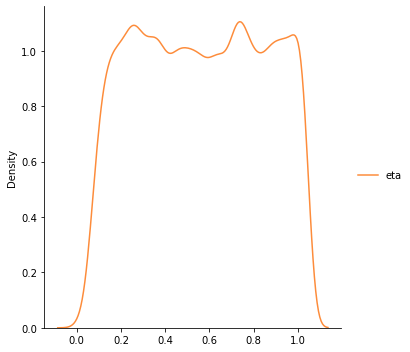

In [18]:
distribution_train_pt = sns.displot(train_labels_df[['pt']], kind='kde')
# distribution_train_pt.figure.savefig('train_pt.jpg', dpi=300, bbox_inches='tight')

distribution_train_eta = sns.displot(train_labels_df[['eta']], kind='kde', palette='Oranges')
# distribution_train_eta.figure.savefig('train_eta.jpg', dpi=300, bbox_inches='tight')

distribution_test_pt = sns.displot(test_labels_df[['pt']], kind='kde')
# distribution_test_pt.figure.savefig('test_pt.jpg', dpi=300, bbox_inches='tight')

distribution_test_eta = sns.displot(test_labels_df[['eta']], kind='kde', palette='Oranges')
# distribution_test_eta.figure.savefig('test_eta.jpg', dpi=300, bbox_inches='tight')

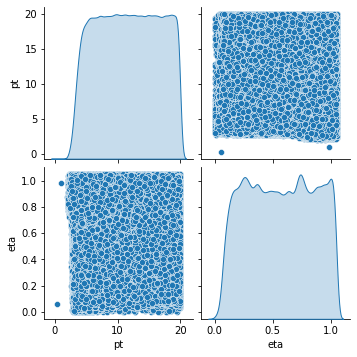

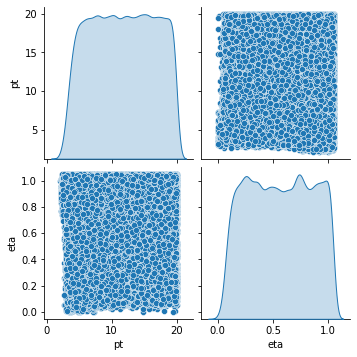

In [19]:
sns.pairplot(train_labels_df[['pt', 'eta']], diag_kind='kde')
sns.pairplot(test_labels_df[['pt', 'eta']], diag_kind='kde')

In [20]:
train_labels_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pt,850003.0,11.705093,4.811318,0.316382,7.584748,11.721739,15.859678,20.000000
eta,850003.0,0.564914,0.282033,0.000002,0.318579,0.565487,0.808634,1.049999


In [21]:
test_labels_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pt,94445.0,11.708163,4.804642,2.125966,7.600030,11.735133,15.839898,19.999775
eta,94445.0,0.563487,0.282369,0.000073,0.317003,0.563709,0.806894,1.049972
